In [ ]:
pip list

In [1]:
import pandas as pd
mylist = []

for chunk in  pd.read_csv('train_dataset_train.csv', chunksize=20000):
    mylist.append(chunk)

data = pd.concat(mylist, axis= 0)
del mylist

In [2]:
data

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,N,0.0,N,N,25.0,...,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,N,0.0,Y,N,83.0,...,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,N,0.0,N,N,1700.0,...,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,N,0.0,N,N,269.0,...,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [3]:
data = data[data["weight"] != 0]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995107 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [5]:
data = data.dropna()

In [6]:
data["is_in_yandex"].value_counts()

N    3582351
Y    2410086
0       2670
Name: is_in_yandex, dtype: int64

In [7]:
data["postmark"].value_counts().head(60)

0.0       5994093
512.0         901
1024.0         79
8.0            23
256.0           7
1.0             4
Name: postmark, dtype: int64

In [8]:
data["is_return"].value_counts()

N    5988132
Y       6975
Name: is_return, dtype: int64

In [9]:
data["is_privatecategory"].value_counts()

N    5989631
Y       2806
0       2670
Name: is_privatecategory, dtype: int64

In [10]:
fix_data = data[(data["is_in_yandex"] != "0") & (data["is_privatecategory"] != "0")]

In [11]:
fix_data["is_in_yandex"].value_counts()

N    3582351
Y    2410086
Name: is_in_yandex, dtype: int64

In [12]:
fix_data

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,N,0.0,N,N,25.0,...,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,N,0.0,Y,N,83.0,...,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,N,0.0,N,N,1700.0,...,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,N,0.0,N,N,269.0,...,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [13]:
# Разбираемся с категориальными признаками

In [14]:
fix_data["is_in_yandex"] = pd.Categorical(fix_data["is_in_yandex"])
fix_data["is_in_yandex"].astype('category').cat.codes
fix_data["is_in_yandex"] = fix_data["is_in_yandex"].cat.codes

fix_data["is_privatecategory"] = pd.Categorical(fix_data["is_privatecategory"])
fix_data["is_privatecategory"].astype('category').cat.codes
fix_data["is_privatecategory"] = fix_data["is_privatecategory"].cat.codes

fix_data["is_return"] = pd.Categorical(fix_data["is_return"])
fix_data["is_return"].astype('category').cat.codes
fix_data["is_return"] = fix_data["is_return"].cat.codes

C:\Users\kingo\AppData\Local\Temp\ipykernel_34504\2392978347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_data["is_in_yandex"] = pd.Categorical(fix_data["is_in_yandex"])
C:\Users\kingo\AppData\Local\Temp\ipykernel_34504\2392978347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_data["is_in_yandex"] = fix_data["is_in_yandex"].cat.codes
C:\Users\kingo\AppData\Local\Temp\ipykernel_34504\2392978347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [15]:
fix_data

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,0,0.0,1,0,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,0,0.0,0,0,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,0,0.0,1,0,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,0,0.0,1,0,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,0,0.0,1,0,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,0,0.0,0,0,25.0,...,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,0,0.0,1,0,83.0,...,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,0,0.0,0,0,1700.0,...,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,0,0.0,0,0,269.0,...,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [16]:
fix_data["type"].value_counts()

Цех               2093072
ММПО              1613574
Участок            925064
ГОПС               462814
ТИ                 305481
П                  245796
МСЦ                223207
СОПС                71832
СЦ                  12469
ОП                   9527
МСО                  7465
ОПП                  7190
АОПП                 6682
МРП                  3850
АО                   1304
ПЕРЕДВИЖНОЕ ОС       1003
0                     773
ППС                   682
УМСЦ                  569
УКД                    83
Name: type, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

fix_data['type'] = label.fit_transform(fix_data['type'])

C:\Users\kingo\AppData\Local\Temp\ipykernel_34504\292522975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_data['type'] = label.fit_transform(fix_data['type'])


In [18]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992437 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           int32  
 4   priority                       float64
 5   is_privatecategory             int8   
 6   class                          float64
 7   is_in_yandex                   int8   
 8   is_return                      int8   
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [19]:
fix_data["name_mfi"].value_counts().head(60)

0                              812029
Mobile Phone Bags & Cases       48146
Screen Protectors               45016
phone case                      42675
Phone Case                      25011
Mobile Phone Cases & Covers     22487
cable                           17297
Stickers Decals                 15951
T-Shirts                        15882
screen protector                14987
Necklace                        14658
necklace                        14114
Earphones & Headphones          13644
Sunglasses                      13384
Phone Bumpers                   13122
shoes                           12760
Dresses                         12752
Car Stickers                    12599
Car decoration                  12010
Integrated Circuits             11925
BRA                             11345
Rings                            9099
Panties                          8886
hat                              8430
Socks                            8309
Phone case                       8241
dress       

In [20]:
fix_data["mailtype"].value_counts().head(60)

5.0    5985301
0.0       5079
2.0       1468
7.0        462
4.0         84
1.0         20
8.0         19
6.0          2
9.0          2
Name: mailtype, dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'priority'}>,
        <AxesSubplot:title={'center':'is_privatecategory'}>,
        <AxesSubplot:title={'center':'class'}>],
       [<AxesSubplot:title={'center':'is_in_yandex'}>,
        <AxesSubplot:title={'center':'is_return'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'mailtype'}>,
        <AxesSubplot:title={'center':'mailctg'}>],
       [<AxesSubplot:title={'center':'mailrank'}>,
        <AxesSubplot:title={'center':'directctg'}>,
        <AxesSubplot:title={'center':'transport_pay'}>,
        <AxesSubplot:title={'center':'postmark'}>,
        <AxesSubplot:title={'center':'weight_mfi'}>],
       [<AxesSubplot:title={'center':'price_mfi'}>,
        <AxesSubplot:title={'center':'dist_qty_oper_login_1'}>,
        <AxesSubplot:title={'center':'total_qty_oper_login_1'}>,
        <AxesSubplot:title={'center':'total_

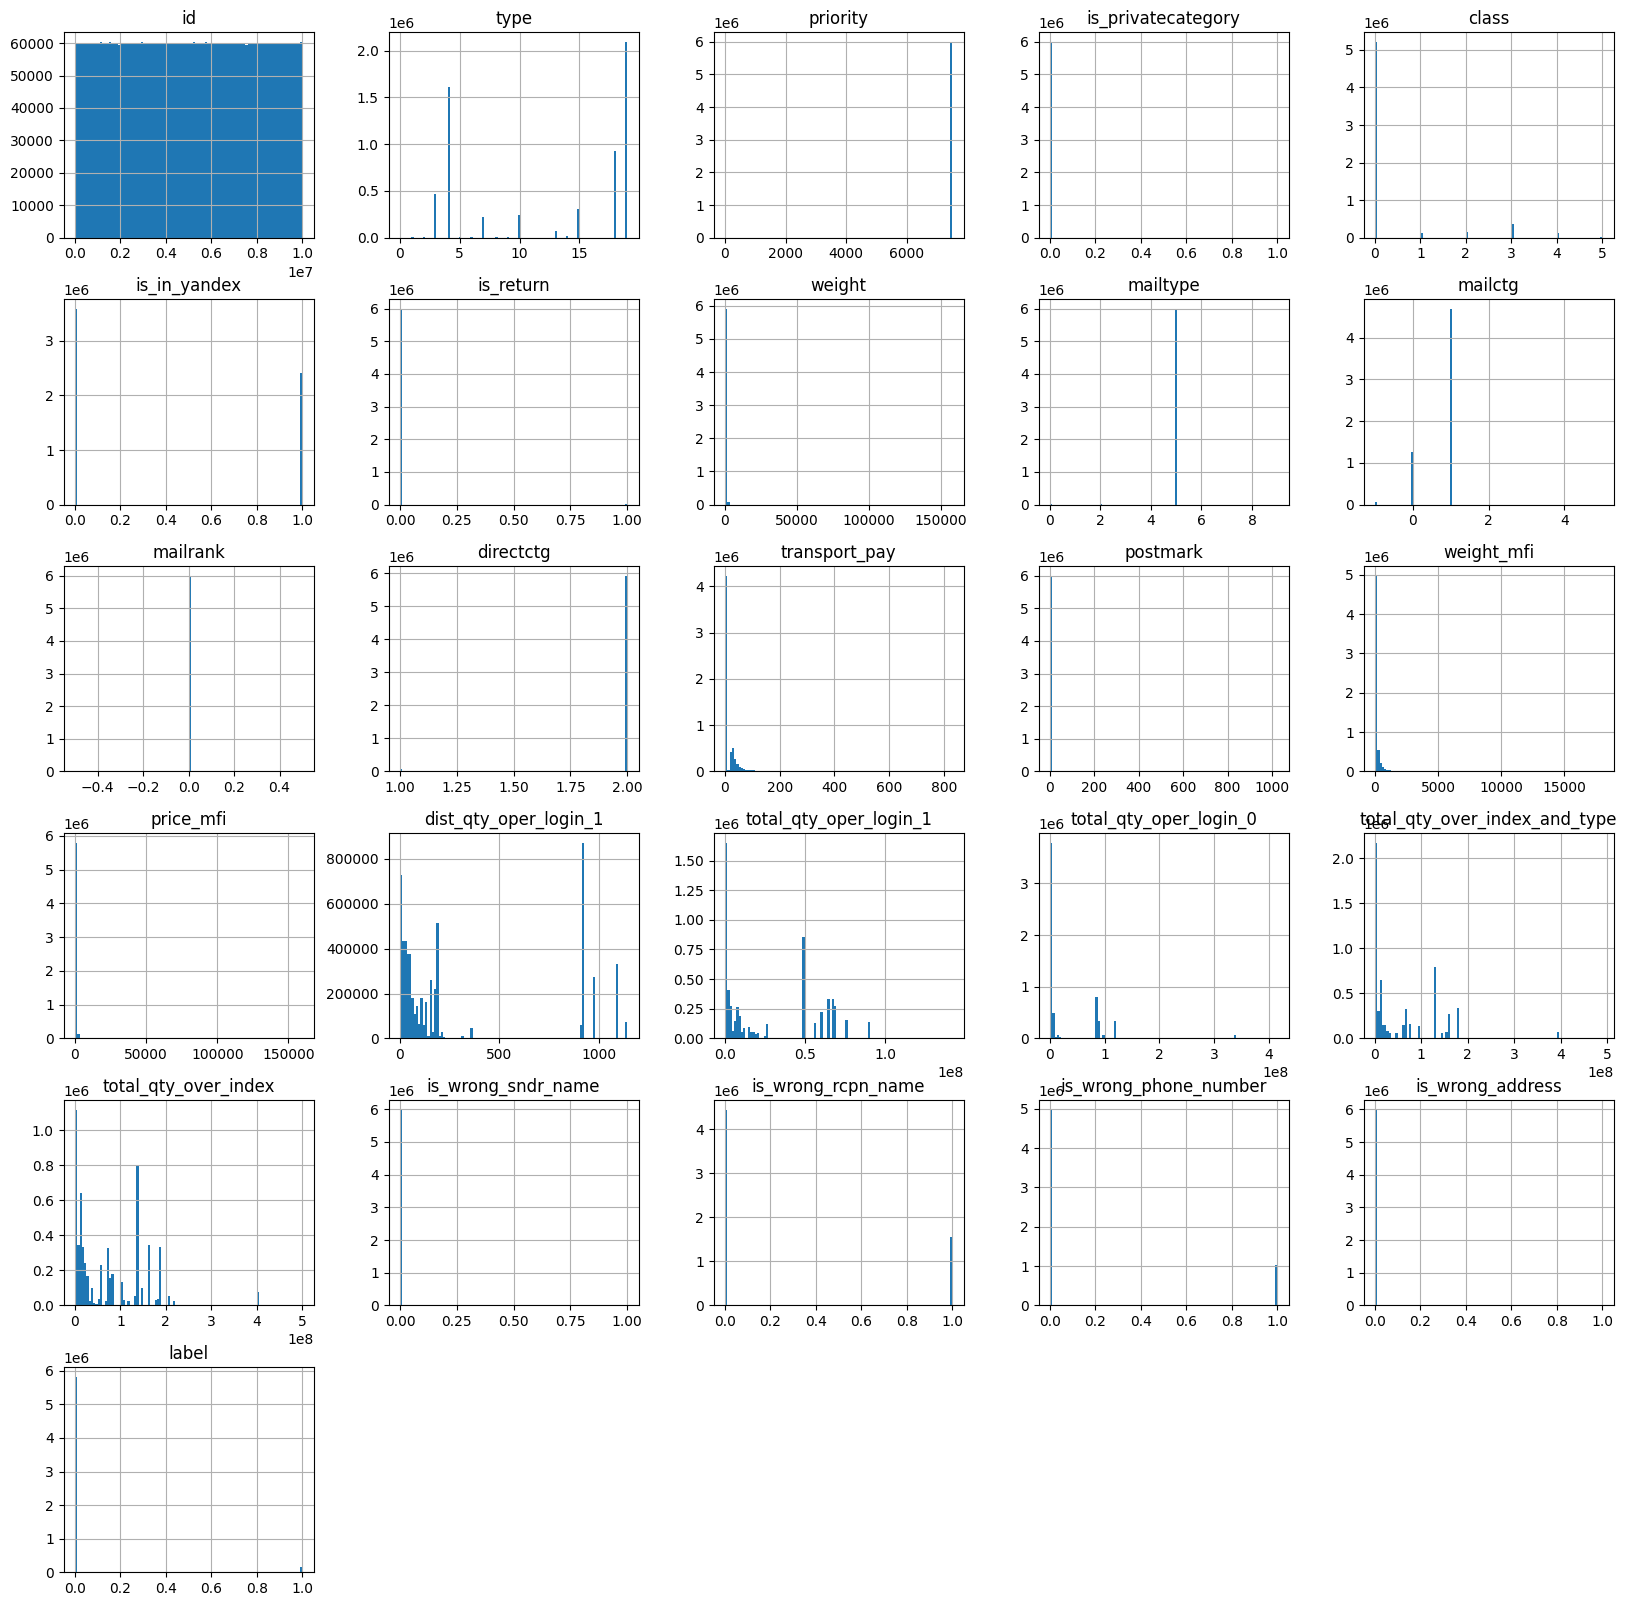

In [21]:
fix_data.hist(bins = 100, figsize = (20,20))

In [22]:
col_obj = fix_data.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id", "label"]))

In [23]:
col_obj

['id', 'index_oper', 'oper_type + oper_attr', 'name_mfi', 'label']

In [24]:
test_data = fix_data.sample(10000)

In [25]:
X = fix_data.drop(col_obj, axis = 1)
y = fix_data[["label"]]

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X, y)

In [ ]:
X.to_csv("checkp_data.csv")

In [ ]:
y.to_csv("checkp_targ.csv")

In [ ]:
X.hist(bins = 100, figsize = (20,20))

In [27]:
import sklearn

<AxesSubplot:>

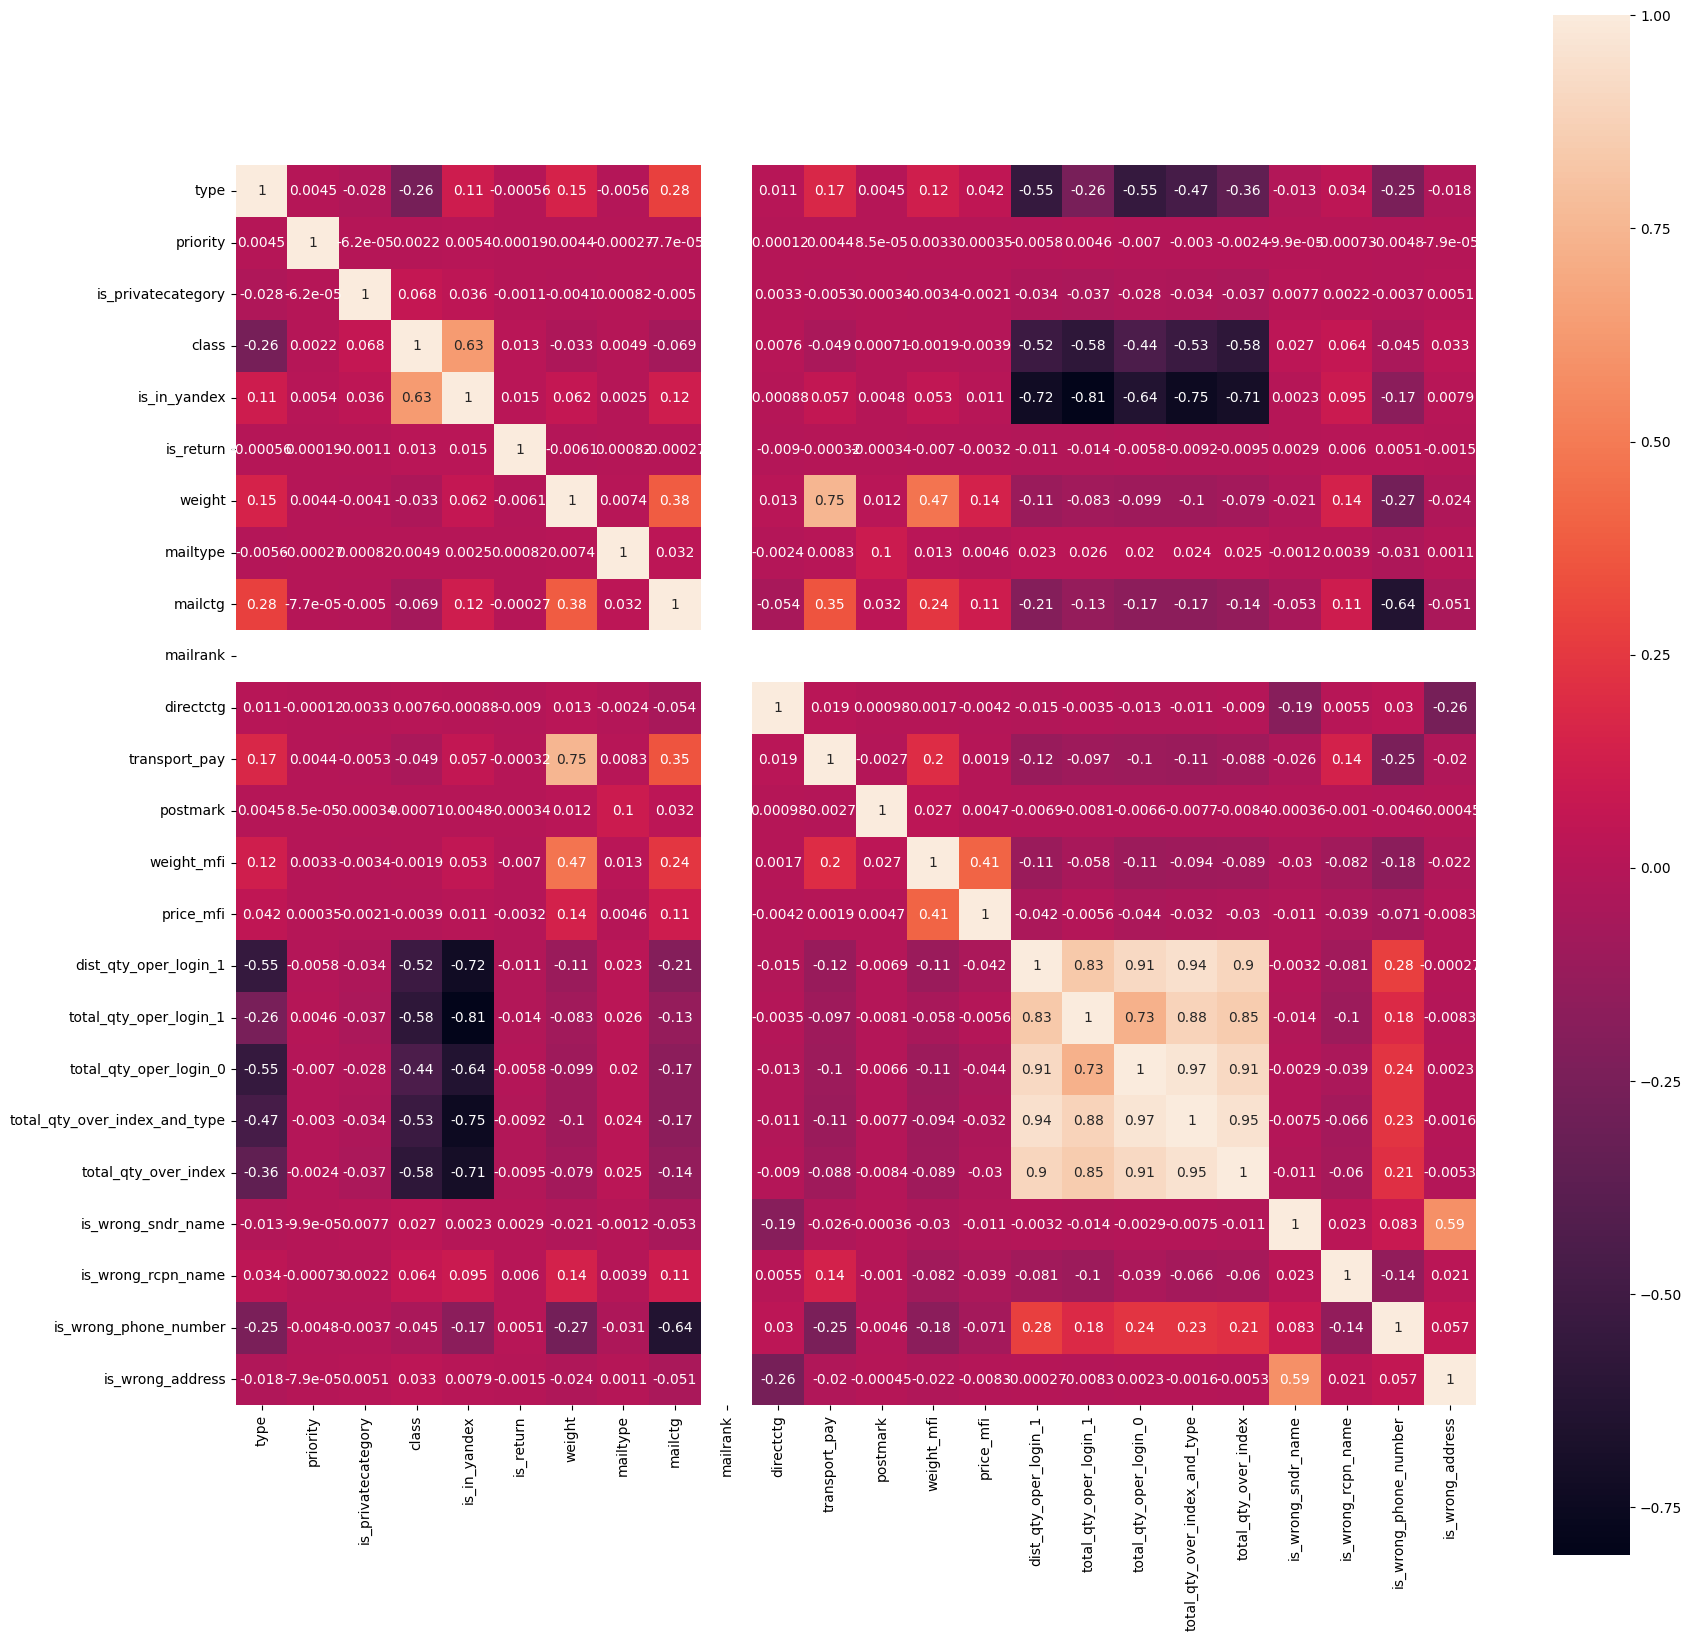

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,20

corr = X_train.iloc[:100000].corr()
sns.heatmap(corr, square = True, annot=True)

In [31]:
X_train = X_train.drop(columns = ["is_in_yandex"])

In [32]:
X_test = X_test.drop(columns = ["is_in_yandex"])

In [ ]:
X_train

In [ ]:
corr = corr_defend.iloc[:100000].corr()
sns.heatmap(corr, square = True, annot=True)

In [ ]:
cfl11 = ExtraTreesClassifier()

cfl11.fit(X_train, y_train)

In [ ]:
X_train.hist(bins = 100, figsize= (20,20))

In [ ]:
corr = X_train.iloc[:100000].corr()
sns.heatmap(corr, square = True, annot=True)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier



In [ ]:
cfl11 = ExtraTreesClassifier()
clf10 = RandomForestClassifier()
clf4 = CatBoostClassifier()

clf9 = VotingClassifier(estimators=[
                                    ('EFT', cfl11),
    ('XGB', clf4),
    ('RFT', clf10)],
                        voting='soft')
clf9.fit(X_train, y_train)

In [ ]:
pred = clf9.predict(X_test)
from sklearn.metrics import recall_score

score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, random_state=0, max_features = 25)
clf.fit(X_train, y_train)

C:\Users\kingo\AppData\Local\Temp\ipykernel_34504\1323523661.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_features=25, n_estimators=200, random_state=0)

In [40]:
pred = clf.predict(X_test)
from sklearn.metrics import recall_score

score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

Recall 0.8720851590077474


In [ ]:
from lightgbm import LGBMClassifier

lgbt = LGBMClassifier()
lgbt.fit(X_train, y_train)

In [ ]:
pred = lgbt.predict(X_test)
from sklearn.metrics import recall_score

score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

In [ ]:
from catboost import CatBoostClassifier

model_params = {
    'iterations': 6000, 
    'loss_function': 'Logloss',
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = "saga")
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

In [ ]:
import xgboost

clf = xgboost.XGBClassifier()
clf.fit(X_train, y_train)


In [ ]:
pred = clf.predict(X_test)
score = recall_score(y_test, pred, average = "macro" )
print("Recall", score)

In [ ]:
X_test

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


model = Sequential() # Построение модели
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # Построение модели
model.add(Dense(1, activation='sigmoid')) # Формирование результирующего слоя модели

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] ) # Сборка модели с нужными параметрами

In [ ]:
history = model.fit(X_train,y_train, epochs = 5) # Обучение модели

In [ ]:
pred = model.predict(X_test)

score = recall_score(y_test, pred.round(), average = "macro" )
print("Recall", score)

In [ ]:
pred

In [ ]:
models = {}

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)


In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

In [41]:
mylist = []

for chunk in  pd.read_csv('test_dataset_test.csv', chunksize=20000):
    mylist.append(chunk)

test_data_lb = pd.concat(mylist, axis= 0)
del mylist

In [42]:
test_data_lb

MemoryError: Unable to allocate 183. MiB for an array with shape (6, 4000000) and data type float64

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
0,7815282,8_13,102976.0,ММПО,7503.0,N,0.0,N,N,85.0,...,489.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,0,0
1,8443555,8_2,238753.0,ГОПС,7503.0,N,4.0,Y,N,21.0,...,186.0,2.0,2895.0,1545.0,4440.0,20623.0,0,1,1,0
2,6352559,1020_-1,618254.0,ГОПС,7503.0,N,4.0,Y,N,388.0,...,500.0,3.0,2751.0,993.0,3744.0,37817.0,0,0,0,0
3,4921420,1016_-1,102968.0,ТИ,7503.0,N,0.0,N,N,1203.0,...,0.0,69.0,9379609.0,2267333.0,11646942.0,11759329.0,0,1,0,0
4,1420440,1018_-1,102971.0,Цех,7506.0,N,0.0,N,N,956.0,...,1267.0,181.0,76138189.0,8747.0,76146936.0,84110459.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,9030800,1017_1001,655003.0,ГОПС,7503.0,N,4.0,Y,N,53.0,...,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,0,0,0
3999996,6275048,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,286.0,...,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,1,0,0
3999997,4701757,1022_-1,102969.0,ТИ,7503.0,N,0.0,N,N,733.0,...,300.0,106.0,17348074.0,3469387.0,20817461.0,20821109.0,0,1,0,0
3999998,611153,39_-1,104006.0,Участок,7503.0,N,0.0,N,N,265.0,...,500.0,2.0,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0


In [43]:
import random

test_data_lb['is_privatecategory'] = test_data_lb['is_privatecategory'].replace("0", random.choice(['Y', 'N']))
test_data_lb['is_in_yandex'] = test_data_lb['is_in_yandex'].replace("0", random.choice(['Y', 'N']))

In [44]:
test_data_lb["is_in_yandex"] = pd.Categorical(test_data_lb["is_in_yandex"])
test_data_lb["is_in_yandex"].astype('category').cat.codes
test_data_lb["is_in_yandex"] = test_data_lb["is_in_yandex"].cat.codes

test_data_lb["is_privatecategory"] = pd.Categorical(test_data_lb["is_privatecategory"])
test_data_lb["is_privatecategory"].astype('category').cat.codes
test_data_lb["is_privatecategory"] = test_data_lb["is_privatecategory"].cat.codes

test_data_lb["is_return"] = pd.Categorical(test_data_lb["is_return"])
test_data_lb["is_return"].astype('category').cat.codes
test_data_lb["is_return"] = test_data_lb["is_return"].cat.codes

In [45]:
test_data_lb["is_privatecategory"].value_counts()

0    3998180
1       1820
Name: is_privatecategory, dtype: int64

In [46]:
test_data_lb = test_data_lb.drop(columns = ["is_in_yandex"])

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

test_data_lb['type'] = label.fit_transform(test_data_lb['type'])

In [48]:
col_obj = test_data_lb.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id"]))

In [49]:
X_log = test_data_lb.drop(col_obj, axis = 1)


In [50]:
X_log

,type,priority,is_privatecategory,class,is_return,weight,mailtype,mailctg,mailrank,directctg,...,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
0,4,7503.0,0,0.0,0,85.0,5.0,1.0,0.0,2.0,...,489.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,0,0
1,3,7503.0,0,4.0,0,21.0,5.0,0.0,0.0,2.0,...,186.0,2.0,2895.0,1545.0,4440.0,20623.0,0,1,1,0
2,3,7503.0,0,4.0,0,388.0,5.0,1.0,0.0,2.0,...,500.0,3.0,2751.0,993.0,3744.0,37817.0,0,0,0,0
3,15,7503.0,0,0.0,0,1203.0,5.0,1.0,0.0,2.0,...,0.0,69.0,9379609.0,2267333.0,11646942.0,11759329.0,0,1,0,0
4,19,7506.0,0,0.0,0,956.0,5.0,1.0,0.0,2.0,...,1267.0,181.0,76138189.0,8747.0,76146936.0,84110459.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3,7503.0,0,4.0,0,53.0,5.0,1.0,0.0,2.0,...,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,0,0,0
3999996,4,7503.0,0,0.0,0,286.0,5.0,1.0,0.0,2.0,...,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,1,0,0
3999997,15,7503.0,0,0.0,0,733.0,5.0,1.0,0.0,2.0,...,300.0,106.0,17348074.0,3469387.0,20817461.0,20821109.0,0,1,0,0
3999998,18,7503.0,0,0.0,0,265.0,5.0,1.0,0.0,2.0,...,500.0,2.0,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0


In [ ]:
X

In [51]:
pred = clf.predict(X_log)

In [ ]:
pred

In [ ]:
test_data_lb["id"]

In [52]:
test_data_check = pd.DataFrame({"id": test_data_lb["id"], "label": pred})

In [53]:
test_data_check

,id,label
0,7815282,0
1,8443555,1
2,6352559,1
3,4921420,0
4,1420440,0
...,...,...
3999995,9030800,1
3999996,6275048,1
3999997,4701757,0
3999998,611153,0


In [54]:
test_data_check.to_csv("luuul_12.csv", sep=",", index=False, line_terminator='\n')